# PlaygroundML
---
# 7. $k$-Means Clustering

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset generator
from sklearn.datasets import make_blobs

# My implementation of KMeans
from kmeans import KMeans as MyKMeans

# Sklearn implementation of KMeans 
from sklearn.cluster import KMeans as KMeans_sklearn

# Set latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## 6.1 Illustration of $k$-Means Clustering

The $k$-Means clustering algorithm is a limiting case of the Gaussian Mixture Model (GMM), with $\pi_m = 1/k$ and $\Sigma_m = \sigma^2 I$, with $\sigma^2 \to 0$. The algorithm is as follows:

1. Initialize the cluster means $\{\mathbf{\mu}_l\}$.
2. Assign each data point to the nearest cluster mean, by setting the responsibilities:
$$
    r_{im} = \begin{cases}
        1 & \text{if } m = \arg\min_l \|\mathbf{x}_i - \mathbf{\mu}_l\|^2 \\
        0 & \text{otherwise}
    \end{cases}
$$
3. Update the cluster means:
$$
    \mathbf{\mu}_m = \frac{\sum_i r_{im} \mathbf{x}_i}{\sum_i r_{im}}
$$
4. Repeat steps 2 and 3 until the cluster means converge.

Below we employ the $k$-Means algorithm with the `KMeans()` class from `kmeans.py` to cluster a 2D dataset. First we generate and plot a 2D dataset with 2 clusters.

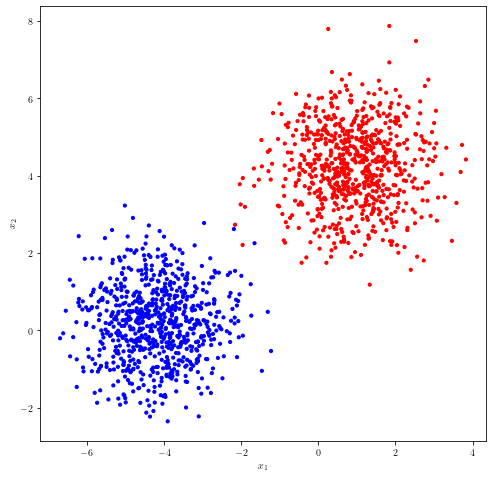

In [106]:
# Generate toy dataset from sklearn
n_samples = 1500
n_features = 2
n_clusters = 2
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=3)
colours = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange', 'purple', 'brown']

# Plot the toy dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=10, c=[colours[i] for i in y])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Next, we apply the $k$-Means algorithm to the dataset and plot the resulting clusters.

 Converged after 3 iterations


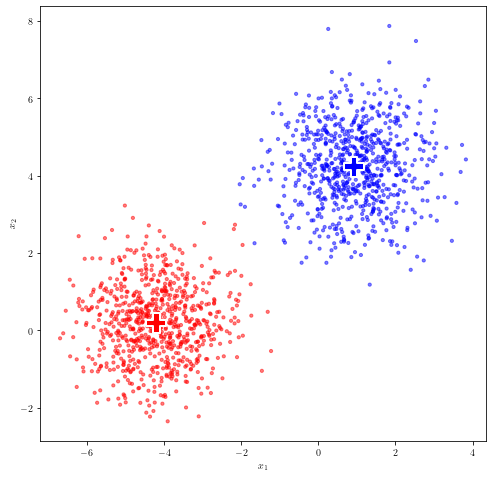

In [108]:
clf = MyKMeans(k=2, max_iter=1000, tol=1e-4)
intial_means = np.array([[-5, 7], [2, 0]])
clf.fit(X, verbose=True)
y_pred = clf.labels

# Plot the toy dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=10, c=[colours[i] for i in y_pred], alpha=0.5)
plt.scatter(clf.means[:, 0], clf.means[:, 1], s=400, c=[colours[i] for i in range(len(clf.means))], edgecolors='white', linewidths=2, marker='P')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('kmeans.pdf', dpi=600, bbox_inches='tight')
plt.show()

As we can see above, the $k$-Means algorithm very quickly converges to the correct (albeit quite easy to distinguish) clusters. Below we plot a gif to visualise the training process of the algorithm.

 Converged after 3 iterations


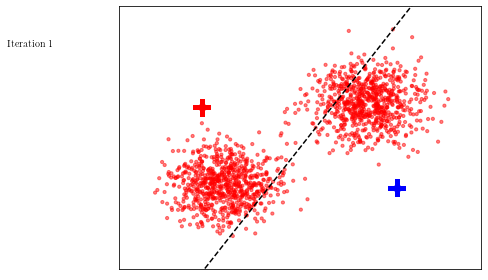

In [109]:
# Code to produce animated gif
import matplotlib.animation as animation

clf = MyKMeans(k=2, max_iter=1000, tol=1e-6)
initial_means = np.array([[-5, 4], [2, 0]])
clf.fit(X, verbose=True, initial_means=initial_means)
# y_pred = clf.labels

def kMeansIter(i):

    y_pred = clf.labels_history[i].astype(int)
    means = clf.means_history[i]

    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], s=10, c=[colours[j] for j in y_pred], alpha=0.5)
    plt.scatter(means[:, 0], means[:, 1], s=400, c=[colours[j] for j in range(len(means))], edgecolors='white', linewidths=2, marker='P')

    # Plot perpendicular bisector of the line joining the means - FOR k=2 ONLY
    midpoint = np.mean(means, axis=0)
    gradient = -1 / ((means[1, 1] - means[0, 1]) / (means[1, 0] - means[0, 0]))
    y = lambda x: gradient * (x - midpoint[0]) + midpoint[1]

    x = np.linspace(-10, 10, 100)
    plt.plot(x, y(x), 'k--')

    plt.xticks([])
    plt.yticks([])
    plt.xlim(-8, 5)
    plt.ylim(-4, 9)
    plt.text(-12,7, f'Iteration {i+1}')
    plt.tight_layout()


fig, ax = plt.subplots(figsize=(7, 4))
anim = animation.FuncAnimation(fig, kMeansIter, frames=len(clf.labels_history), interval=1000, repeat=False)

# Save gif
# anim.save('kmeans_5.gif', dpi=400, writer='imagemagick', fps=8)